In [774]:
import psycopg2

con = psycopg2.connect(database="store_database", user="cindy", password="Flamingosis01.", host="localhost", port="5432")

print("Database opened successfully")


Database opened successfully


In [775]:
cur = con.cursor()

In [776]:
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
from IPython import display
import matplotlib.image as mpimg
from matplotlib import rcParams

In [806]:
pd.DataFrame(psql.read_sql("SELECT * FROM stores", con)) #Displaying raw data from dable 'stores'

id                 name         province postal code
0    0          H&M Alkmaar          Alkmaar     1811 JJ
1    1          H&M Alkmaar          Alkmaar     1811 JK
2    2           H&M Almelo           Almelo     7607 HR
3    3           H&M Almere           Almere     1315 VN
4    4  H&M Alphen a/d Rijn  Alphen a/d Rijn    2405 DB 
..  ..                  ...              ...         ...
89  89          H&M Zaandam          Zaandam     1506 CC
90  90            H&M Zeist            Zeist     3701 DK
91  91       H&M Zoetermeer       Zoetermeer     2711 AN
92  92          H&M Zutphen          Zutphen     7201 CZ
93  93           H&M Zwolle           Zwolle     8011 RD

[94 rows x 4 columns]

In [807]:
pd.DataFrame(psql.read_sql("SELECT * FROM items", con)) #Displaying framed table 'items'

id                             name      product_type            color  \
0   1             Fijngebreide coltrui  Shirts & Blouses      Donkerbruin   
1   2  Easy Iron-overhemd Regular Fit
  Shirts & Blouses       Lichtblauw   
2   3       Capuchonsweater met motief   Jackets & Coats  Lichtroze/Keith   
3   4                   Corduroy broek          Trousers      Donkerbruin   
4   5              Gewatteerde overall   Jackets & Coats            Blauw   
5   6          Pyjama met wijde pijpen          Trousers         Gebroken   
6   7        Hoge waterdichte sneakers             Shoes            Zwart   
7   8      Wide lyocell-blend trousers          Trousers             Roze   
8   9           Oversized Shirt Jacket   Jackets & Coats            Blauw   
9  10                 Long Fit T-shirt  Shirts & Blouses              Wit   

         barcode     availability  price  
0   673677036006           Online     15  
1   977237004005         In Store     15  
2   892036036004         In Store     30  
3  1012508002010         In Store     25  
4   887085013004    Not available     35  
5   980646003012    Only in Store     15  
6   901591003016      Only online     35  
7     1000880001         In Store     40  
8      934816001         In Store     35  
9      598755002  In Store/Online     10

In [808]:
pd.DataFrame(psql.read_sql("SELECT * FROM categories", con))#Displaying framed table 'categories'

id     name  parent_id
0      1      Men        NaN
1      2    Women        NaN
2      3  Divided        NaN
3      4     Baby        NaN
4      5     Kids        NaN
..   ...      ...        ...
101  102   Shorts        7.0
102  103   Shorts        8.0
103  104   Shorts        9.0
104  105   Shorts       23.0
105  106   Shorts       24.0

[106 rows x 3 columns]

In [789]:
psql.read_sql("""
  SELECT categories.id, categories.name, store_items.item_id, store_items.store_id
  FROM categories AS categories
  LEFT JOIN store_items AS store_items ON categories.parent_id = store_items.store_id
;""", con)

id     name  item_id  store_id
0      1      Men      NaN       NaN
1      2    Women      NaN       NaN
2      3  Divided      NaN       NaN
3      4     Baby      NaN       NaN
4      5     Kids      NaN       NaN
..   ...      ...      ...       ...
334  104   Shorts     40.0       9.0
335  104   Shorts     45.0       9.0
336  104   Shorts     60.0       9.0
337  105   Shorts      NaN       NaN
338  106   Shorts      NaN       NaN

[339 rows x 4 columns]

In [792]:
pd.DataFrame(psql.read_sql("""

SELECT
    opening_times.store_id, 
    opening_times.monday, 
    opening_times.tuesday, 
    opening_times.wednesday, 
    opening_times.thursday, 
    opening_times.friday, 
    opening_times.saturday, 
    opening_times.sunday, 
    opening_time_exceptions.date,
    opening_time_exceptions.time      
FROM opening_times 
JOIN opening_time_exceptions ON opening_times.store_id = opening_time_exceptions.store_id 

""", con))

store_id          monday      tuesday    wednesday     thursday  \
0          2  11:00 - 18:00   10:00-18:00  10:00-18:00  10:00-21:00   
1          8  11:00 - 20:00   10:00-20:00  10:00-20:00  10:00-21:00   
2         18  12:00 - 18:00   10:00-18:00  10:00-18:00  10:00-21:00   
3         30     13:00-18:00  10:00-18:00  10:00-18:00  10:00-21:00   
4         31  11:00 - 18:00   10:00-18:00  10:00-18:00  10:00-18:00   
5         35     13:00-18:00  10:00-18:00  10:00-18:00  10:00-21:00   
6         39   12:00 - 17:30  09:30-17:30  09:30-17:30  09:30-21:00   
7         44     13:00-18:00  10:00-18:00  10:00-18:00  10:00-21:00   
8         49  12:00 - 18:00   10:00-18:00  10:00-18:00  10:00-21:00   
9         52     13:00-18:00  10:00-18:00  10:00-18:00  10:00-21:00   
10        81     13:00-18:00  10:00-18:00  10:00-18:00  10:00-21:00   
11        88     13:00-18:00  10:00-18:00  10:00-18:00  10:00-21:00   
12        92     13:00-18:00  10:00-18:00  10:00-18:00  10:00-21:00   

         friday      saturday       sunday        date           time  
0   10:00-18:00   10:00-17:30       Closed  2021-11-28  12:00 - 17:00  
1   10:00-20:00   10:00-20:00  11:00-20:00  2021-11-10         Closed  
2   10:00-18:00  10:00 -17:30  12:00-17:00  2021-11-28  12:00 - 17:00  
3   10:00-18:00   10:00-17:00  10:00-17:00  2021-11-28  12:00 - 17:00  
4   10:00-18:00   10:00-21:00  10:00-17:30  2021-11-28  12:00 - 17:00  
5   10:00-18:00   10:00-17:30       Closed  2021-11-28  12:00 - 17:00  
6   09:30-17:30   09:30-17:00       Closed  2021-11-28  12:00 - 17:00  
7   10:00-18:00   10:00-17:30       Closed  2021-11-28  12:00 - 17:00  
8   10:00-18:00  10:00 -18:00  12:00-17:00  2021-11-28  12:00 - 17:00  
9   10:00-18:00   10:00-17:30       Closed  2021-11-28  12:00 - 17:00  
10  10:00-18:00   09:30-17:00       Closed  2021-11-28  12:00 - 17:00  
11  10:00-21:00   10:00-17:00       Closed  2021-11-28  12:00 - 17:00  
12  10:00-18:00   10:00-17:30  09:30-17:30  2021-11-28  12:00 - 17:00

In [801]:
pd.DataFrame(psql.read_sql("""

SELECT 
    stores.name , 
    items.name 
FROM items 
JOIN stores ON stores.id = stores.id 
INNER JOIN store_items ON store_items.item_id = items.id;

""", con)) #Displaying joined framed tables 'items' and 'stores'

name                  name
0            H&M Alkmaar  Fijngebreide coltrui
1            H&M Alkmaar  Fijngebreide coltrui
2             H&M Almelo  Fijngebreide coltrui
3             H&M Almere  Fijngebreide coltrui
4    H&M Alphen a/d Rijn  Fijngebreide coltrui
..                   ...                   ...
747          H&M Zaandam      Long Fit T-shirt
748            H&M Zeist      Long Fit T-shirt
749       H&M Zoetermeer      Long Fit T-shirt
750          H&M Zutphen      Long Fit T-shirt
751           H&M Zwolle      Long Fit T-shirt

[752 rows x 2 columns]

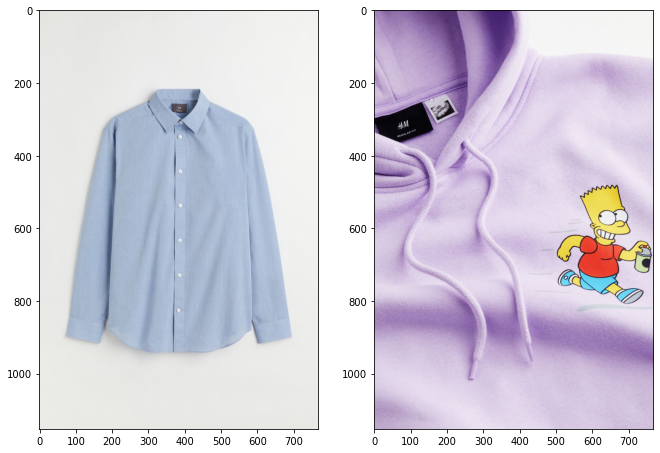

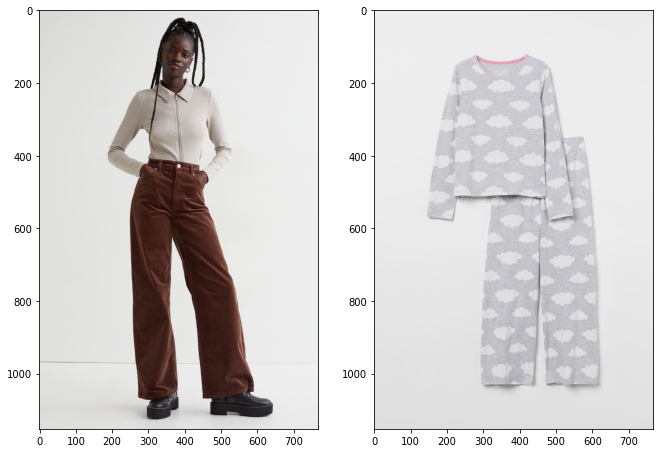

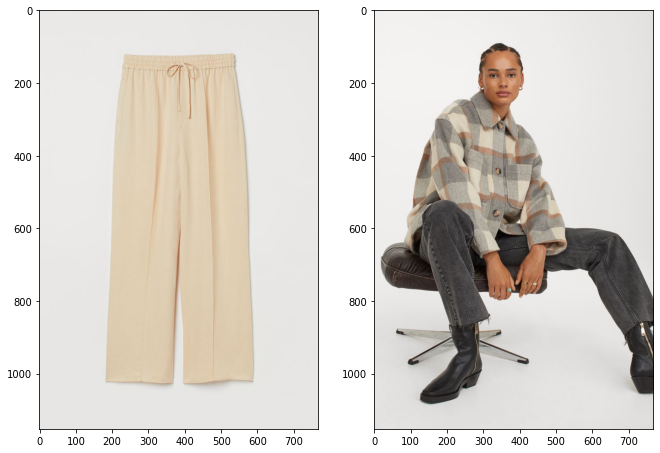

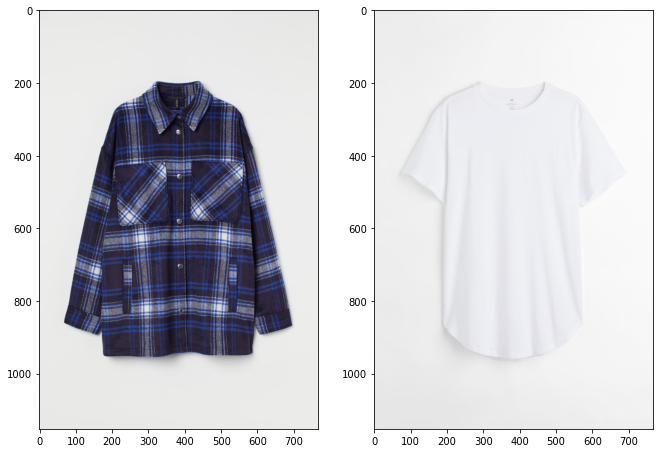

In [815]:
# read images
img_A = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod.jpeg")
img_B = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod (1).jpeg")
img_C = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod (2).jpeg")
img_D = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod (3).jpeg")
img_E = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod (5).jpeg")
img_F = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod (6).jpeg")
img_G = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod (7).jpeg")
img_H = mpimg.imread("/Users/cindymendoncapaez/Documents/hmgoepprod (8).jpeg")

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[1].imshow(img_B);

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_C);
ax[1].imshow(img_D);

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_E);
ax[1].imshow(img_F);

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_G);
ax[1].imshow(img_H);


def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', None)

image_cols = ['imageUrls', 'otherImageUrls']  #<- define which columns will be used to convert to html

# Create the dictionariy to be passed as formatters
format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html







In [802]:
pd.DataFrame(psql.read_sql("""

SELECT stores.name , 
    categories.name 
FROM categories 
INNER JOIN stores ON stores.id = stores.id 
INNER JOIN store_categories ON store_categories.categories_id = categories.id;"""
, con)) 

#Displaying joined framed tables 'stores' and 'categories'

name     name
0              H&M Alkmaar  Clothes
1              H&M Alkmaar  Clothes
2               H&M Almelo  Clothes
3               H&M Almere  Clothes
4      H&M Alphen a/d Rijn  Clothes
...                    ...      ...
14471          H&M Zaandam   Shorts
14472            H&M Zeist   Shorts
14473       H&M Zoetermeer   Shorts
14474          H&M Zutphen   Shorts
14475           H&M Zwolle   Shorts

[14476 rows x 2 columns]

In [803]:
 pd.DataFrame(psql.read_sql("""
 
SELECT stores_locations.name, 
    latitude_longitude_nl.city ,
    latitude_longitude_nl.lat,
    latitude_longitude_nl.lng,
    latitude_longitude_nl.admin_name 
FROM latitude_longitude_nl 
INNER JOIN join_store_locations ON join_store_locations.store_id  = latitude_longitude_nl.city_id
INNER JOIN stores_locations ON join_store_locations.store_id  = stores_locations.id """
,con))

name        city      lat     lng     admin_name
0       H&M Alkmaar     Alkmaar   52.632   4.751  Noord-Holland
1       H&M Alkmaar     Alkmaar   52.632   4.751  Noord-Holland
2       H&M Alkmaar     Alkmaar   52.632   4.751  Noord-Holland
3       H&M Alkmaar     Alkmaar   52.632   4.751  Noord-Holland
4        H&M Almelo      Almelo  52.3567  6.6625     Overijssel
..              ...         ...      ...     ...            ...
195     H&M Zaandam     Zaandam  52.4417  4.8422  Noord-Holland
196       H&M Zeist       Zeist  52.0833  5.2333        Utrecht
197  H&M Zoetermeer  Zoetermeer  52.0575  4.4931   Zuid-Holland
198     H&M Zutphen     Zutphen    52.14   6.195     Gelderland
199      H&M Zwolle      Zwolle  52.5125  6.0944     Overijssel

[200 rows x 5 columns]

In [797]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster
import csv

In [798]:
m_1 = folium.Map(location=[52.370216, 4.895168], tiles='openstreetmap', zoom_start=10)


In [799]:
#Find stores location
stores_data = pd.read_csv('/Users/cindymendoncapaez/opt/anaconda3/lib/python3.8/site-packages/folium/join_table_stores_loc.csv')

# Drop rows with missing locations
stores_data.dropna(subset=['id','lat', 'lng'], inplace=True)

# Print the first five rows of the table
stores_data.head()


id                store                 city        lat       lng  \
0   1          H&M Alkmaar              Alkmaar  52.632000  4.751000   
1   2          H&M Alkmaar              Alkmaar  52.632213  4.747423   
2   3           H&M Almelo               Almelo  52.356700  6.662500   
3   4           H&M Almere               Almere  52.375800  5.225600   
4   5  H&M Alphen a/d Rijn  Alphen aan den Rijn  52.133300  4.650000   

      admin_name postal_code  
0  Noord-Holland     1811 JJ  
1  Noord-Holland     1811 JK  
2     Overijssel     7607 HR  
3      Flevoland     1315 VN  
4   Zuid-Holland    2405 DB

In [800]:
for index,row in stores_data.iterrows():
    lat = row["lat"]
    lon = row["lng"]
    name = row["store"]
    postal_code = row["postal_code"]
    map_displayed_info = '{}  {}'.format(name, postal_code)
    folium.Marker([lat,lon],popup=map_displayed_info).add_to(m_1)
m_1

In [756]:
#find categories in stores
find_categories = pd.read_csv('/Users/cindymendoncapaez/opt/anaconda3/lib/python3.8/site-packages/folium/find_categories.csv')

# Drop rows with missing locations
find_categories.dropna(subset=['lat', 'lng'], inplace=True)

# Print the first five rows of the table
find_categories.head()

store category                 city      lat     lng  \
0           H&M Almelo      Men               Almelo  52.3567  6.6625   
1           H&M Almere    Women               Almere  52.3758  5.2256   
2  H&M Alphen a/d Rijn  Divided  Alphen aan den Rijn  52.1333  4.6500   
3       H&M Amersfoort     Kids           Amersfoort  52.1550  5.3875   
4       H&M Amstelveen  Clothes           Amstelveen  52.3008  4.8639   

      admin_name  
0     Overijssel  
1      Flevoland  
2   Zuid-Holland  
3        Utrecht  
4  Noord-Holland

In [757]:
m_2 = folium.Map(location=[52.370216, 4.895168], tiles='openstreetmap', zoom_start=10)

In [758]:
for index,row in find_categories.iterrows():
    lat = row["lat"]
    lon = row["lng"]
    name = row["store"]
    categories = row["category"]
    map_displayed_info1 = '{} : {}'.format(name, categories)
    folium.Marker([lat,lon],popup=map_displayed_info1).add_to(m_2)
m_2

In [804]:
pd.DataFrame(psql.read_sql("""
SELECT join_item_stores.id,
    join_item_stores.item,
    join_item_stores.store,
    join_item_stores.city, 
    join_item_stores.postal_code, 
    join_item_stores.lat, 
    join_item_stores.lng 
FROM join_item_stores 
WHERE  join_item_stores.item = 'Long Fit T-shirt' 
GROUP BY join_item_stores.id, 
    join_item_stores.item, 
    join_item_stores.store,
    join_item_stores.city, 
    join_item_stores.postal_code, 
    join_item_stores.lat, 
    join_item_stores.lng"""
, con))

id              item                         store           city  \
0   159  Long Fit T-shirt                H&M Middelburg     Middelburg   
1    77  Long Fit T-shirt                     H&M Delft          Delft   
2    42  Long Fit T-shirt                   H&M Alkmaar        Alkmaar   
3   152  Long Fit T-shirt             H&M Heerhugowaard  Heerhugowaard   
4    21  Long Fit T-shirt           H&M Amsterdam Noord      Amsterdam   
5   119  Long Fit T-shirt                H&M Heerenveen     Heerenveen   
6    49  Long Fit T-shirt                H&M Amstelveen     Amstelveen   
7    14  Long Fit T-shirt                H&M Amersfoort     Amersfoort   
8   112  Long Fit T-shirt          H&M Eindhoven Piazza      Eindhoven   
9    70  Long Fit T-shirt                 H&M Apeldoorn      Apeldoorn   
10   28  Long Fit T-shirt          H&M Amsterdam Osdorp      Amsterdam   
11   63  Long Fit T-shirt            H&M HOME Amsterdam      Amsterdam   
12    7  Long Fit T-shirt                    H&M Almelo         Almelo   
13  105  Long Fit T-shirt                H&M Veenendaal     Veenendaal   
14   35  Long Fit T-shirt        H&M Amsterdam Zuidoost      Amsterdam   
15  133  Long Fit T-shirt                H&M Oosterhout     Oosterhout   
16  145  Long Fit T-shirt                 H&M Groningen      Groningen   
17   84  Long Fit T-shirt                  H&M Den Haag       Den Haag   
18  144  Long Fit T-shirt                     H&M Emmen          Emmen   
19  137  Long Fit T-shirt         H&M Eindhoven Woensel      Eindhoven   
20  126  Long Fit T-shirt                    H&M Leiden         Leiden   
21   98  Long Fit T-shirt   H&M Utrecht Hoog Catharijne        Utrecht   
22   56  Long Fit T-shirt                 H&M Amsterdam      Amsterdam   
23   91  Long Fit T-shirt  H&M Rotterdam Zuidplein Kids      Rotterdam   

   postal_code          lat          lng  
0      4331 AN      51.4997       3.6136  
1      2611 DC      52.0119       4.3599  
2      1811 JK   52.6322128  4.747422515  
3      1703 SC       52.668        4.841  
4      1025 ET  52.40200912  4.937660298  
5      8442 BR        52.95       5.9333  
6      1181 ZL      52.3008       4.8639  
7      3811 DC       52.155       5.3876  
8      5611 AE  51.44210871  5.476364785  
9      7311 KG       52.216         5.97  
10      1068SR  52.36092561   4.80714581  
11     1012 PK   52.3699454  4.891077067  
12     7607 HR      52.3567       6.6625  
13     3901 AT       52.025        5.555  
14     1102 DB  52.31493597   4.95276298  
15     4901 NE      51.6431       4.8569  
16      9711LD      53.2167       6.5667  
17     2511 PA      52.0119       4.3599  
18     7811 DH     52.78338          6.9  
19     5625 AG      51.4408       5.4778  
20     2311 EC      52.1583       4.4931  
21     3541 DG  52.09492731  5.111640256  
22     1012 NP      52.3667       4.8839  
23      3083BS      51.9225       4.3599

In [765]:
df.to_csv('join_item_stores.csv', index=False, header=False)

In [766]:
#find item in stores
find_items = pd.read_csv('/Users/cindymendoncapaez/opt/anaconda3/lib/python3.8/site-packages/folium/join_item_stores.csv')

# Drop rows with missing locations
find_items.dropna(subset=['lat','lng'], inplace=True)

# Print the first five rows of the table
find_items.head()

id              item           store        city postal_code        lat  \
0  42  Long Fit T-shirt     H&M Alkmaar     Alkmaar     1811 JK  52.632213   
1   7  Long Fit T-shirt      H&M Almelo      Almelo     7607 HR  52.356700   
2  14  Long Fit T-shirt  H&M Amersfoort  Amersfoort     3811 DC  52.155000   
3  49  Long Fit T-shirt  H&M Amstelveen  Amstelveen     1181 ZL  52.300800   
4  56  Long Fit T-shirt   H&M Amsterdam   Amsterdam     1012 NP  52.366700   

        lng  
0  4.747423  
1  6.662500  
2  5.387600  
3  4.863900  
4  4.883900

In [767]:
m_3 = folium.Map(location=[52.370216, 4.895168], tiles='openstreetmap', zoom_start=10)

In [818]:
for index,row in find_items.iterrows():
    lat = row["lat"]
    lon = row["lng"]
    name = row["store"]
    items = row["item"]
    map_displayed_info2 = '{} : {}'.format(name, items)
    folium.Marker([lat,lon],popup=map_displayed_info2).add_to(m_3)
m_3